# Solution to Exercise 7 Question 2


In [1]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

## Compute M

In [2]:
# Beta distribution
a = 2.0
b = 2.0
qx = lambda x: sc.gamma(a + b) / (sc.gamma(a) * sc.gamma(b)) * x**(a-1) * (1 - x)**(b-1)
M = qx(0.5)
print(f"M = {M}")


M = 1.5


## Rejection sampling

E[r] = 1.4995


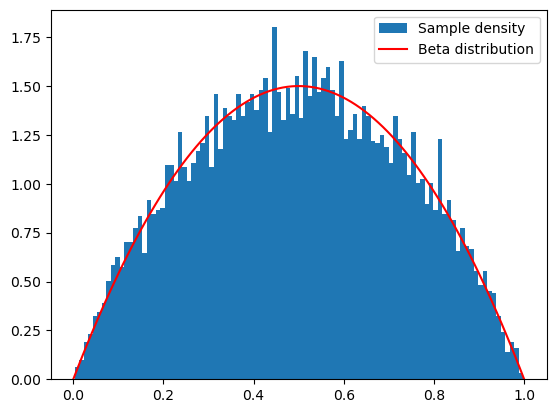

In [3]:
# Do rejection sampling
nrs = 10000
rounds = np.empty((nrs,))
samples_rs = np.empty((nrs,))
for i in range(nrs):
    accepted = False
    r = 1
    while not accepted:
        x = np.random.rand()
        u = np.random.rand()
        if u < qx(x) / M:
            accepted = True
        else:
            r = r + 1
    samples_rs[i] = x
    rounds[i] = r

print(f"E[r] = {rounds.mean()}")    

h, bins = np.histogram(samples_rs, bins=100, density=True)
xs = np.linspace(0,1,100)

plt.figure()
plt.hist(samples_rs, bins=100, density=True, label="Sample density")
plt.plot(xs, qx(xs),'r-', label="Beta distribution")
plt.legend()
plt.show()